# Tutorial 1 - LIFEsim

## We input an example spectrum and compare the expected observations in the different scenarios

In [29]:
import numpy as np
import lifesim
import requests
import matplotlib.pyplot as plt
from spectres import spectres

url = r'https://raw.githubusercontent.com/pahuber/LIFEsim_Tutorial/main/1a_example_spectrum.txt'
response = requests.get(url)

with open('1a_example_spectrum.txt', 'w') as text_file:
  text_file.write(response.text)

#BASELINE SCENARIO

scenario = 'baseline' # Options: 'basline', 'pessimistic', 'optimistic'
spectral_resolution = 50  # Resolving power
minimum_wavelength = 4 # Minimum wavelength of the spectrometer in micron
maximum_wavelength = 18 # Maximum wavelength of the spectrometer in micron
integration_time = 55*60*60  # Overall integration time in s

planet_radius = 1  # Planet effective radius in Earth radii
planet_angular_separation = 0.1  # Planet angular separation from host star in arcsec
star_distance = 10  # Distance to the target system in pc
star_temperature = 5778  # Star effective temperature in K
star_radius = 1  # Star effective radius in Solar radii
exozodi_level = 3  # Exozodi level in zodis

# Create bus
bus = lifesim.Bus()

# Set the baseline scenario
bus.data.options.set_scenario(scenario)

# Set some options manually
bus.data.options.set_manual(spec_res=spectral_resolution)
bus.data.options.set_manual(wl_min=minimum_wavelength)
bus.data.options.set_manual(wl_max=maximum_wavelength)

# Create the instrument and add it to the bus
instrument = lifesim.Instrument(name='inst')
bus.add_module(instrument)

# Create the transmission map and add it to the bus
transm = lifesim.TransmissionMap(name='transm')
bus.add_module(transm)

# Create the noise sources and add them to the bus
exo = lifesim.PhotonNoiseExozodi(name='exo')
bus.add_module(exo)

local = lifesim.PhotonNoiseLocalzodi(name='local')
bus.add_module(local)

star = lifesim.PhotonNoiseStar(name='star')
bus.add_module(star)

# Connect all modules
bus.connect(('inst', 'transm'))
bus.connect(('inst', 'exo'))
bus.connect(('inst', 'local'))
bus.connect(('inst', 'star'))
bus.connect(('star', 'transm'))

# Import the spectrum, setting the planet properties
importer = lifesim.util.importer.SpectrumImporter()
importer.do_import(pathtotext=r'1a_example_spectrum.txt',
                   x_string='micron',
                   y_string='ph m-2 s-1 micron-1',
                   radius_p_spectrum=None,
                   radius_p_target=planet_radius,
                   distance_s_spectrum=10.,
                   distance_s_target=star_distance,
                   integration_time=0)

flux_planet_spectrum = [importer.x_data, importer.y_data]

snr, flux, noise = instrument.get_spectrum(temp_s=star_temperature,
                                           radius_s=star_radius,
                                           distance_s=star_distance,
                                           lat_s=0.78, # In radians
                                           z=exozodi_level,
                                           angsep=planet_angular_separation,
                                           flux_planet_spectrum=flux_planet_spectrum, # In ph m-3 s-1 over m
                                           integration_time=integration_time,
                                           safe_mode=False)

#PESSIMISTIC SCENARIO

scenario = 'pessimistic' # Options: 'basline', 'pessimistic', 'optimistic'

# Create bus
bus = lifesim.Bus()

# Set the baseline scenario
bus.data.options.set_scenario(scenario)

# Set some options manually
bus.data.options.set_manual(spec_res=spectral_resolution)
bus.data.options.set_manual(wl_min=minimum_wavelength)
bus.data.options.set_manual(wl_max=maximum_wavelength)

# Create the instrument and add it to the bus
instrument = lifesim.Instrument(name='inst')
bus.add_module(instrument)

# Create the transmission map and add it to the bus
transm = lifesim.TransmissionMap(name='transm')
bus.add_module(transm)

# Create the noise sources and add them to the bus
exo = lifesim.PhotonNoiseExozodi(name='exo')
bus.add_module(exo)

local = lifesim.PhotonNoiseLocalzodi(name='local')
bus.add_module(local)

star = lifesim.PhotonNoiseStar(name='star')
bus.add_module(star)

# Connect all modules
bus.connect(('inst', 'transm'))
bus.connect(('inst', 'exo'))
bus.connect(('inst', 'local'))
bus.connect(('inst', 'star'))
bus.connect(('star', 'transm'))

snr_p, flux_p, noise_p = instrument.get_spectrum(temp_s=star_temperature,
                                           radius_s=star_radius,
                                           distance_s=star_distance,
                                           lat_s=0.78, # In radians
                                           z=exozodi_level,
                                           angsep=planet_angular_separation,
                                           flux_planet_spectrum=flux_planet_spectrum, # In ph m-3 s-1 over m
                                           integration_time=integration_time,
                                           safe_mode=False)

#OPTIMISTIC SCENARIO

scenario = 'optimistic' # Options: 'basline', 'pessimistic', 'optimistic'

# Create bus
bus = lifesim.Bus()

# Set the baseline scenario
bus.data.options.set_scenario(scenario)

# Set some options manually
bus.data.options.set_manual(spec_res=spectral_resolution)
bus.data.options.set_manual(wl_min=minimum_wavelength)
bus.data.options.set_manual(wl_max=maximum_wavelength)

# Create the instrument and add it to the bus
instrument = lifesim.Instrument(name='inst')
bus.add_module(instrument)

# Create the transmission map and add it to the bus
transm = lifesim.TransmissionMap(name='transm')
bus.add_module(transm)

# Create the noise sources and add them to the bus
exo = lifesim.PhotonNoiseExozodi(name='exo')
bus.add_module(exo)

local = lifesim.PhotonNoiseLocalzodi(name='local')
bus.add_module(local)

star = lifesim.PhotonNoiseStar(name='star')
bus.add_module(star)

# Connect all modules
bus.connect(('inst', 'transm'))
bus.connect(('inst', 'exo'))
bus.connect(('inst', 'local'))
bus.connect(('inst', 'star'))
bus.connect(('star', 'transm'))

snr_o, flux_o, noise_o = instrument.get_spectrum(temp_s=star_temperature,
                                           radius_s=star_radius,
                                           distance_s=star_distance,
                                           lat_s=0.78, # In radians
                                           z=exozodi_level,
                                           angsep=planet_angular_separation,
                                           flux_planet_spectrum=flux_planet_spectrum, # In ph m-3 s-1 over m
                                           integration_time=integration_time,
                                           safe_mode=False)

## Visualizing the example spectrum

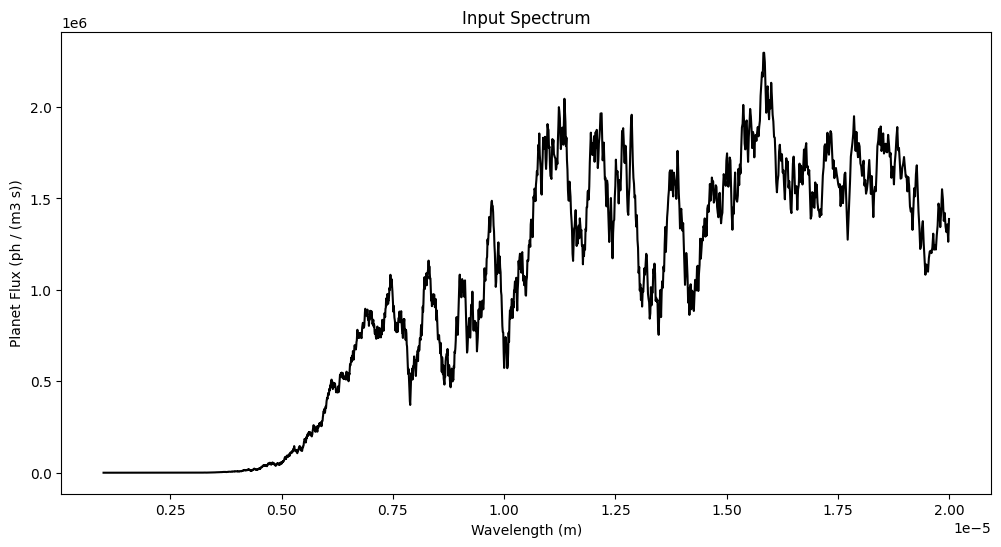

In [51]:
# Plot input spectrum
plt.figure(figsize=(12,6))
plt.plot(importer.x_data, importer.y_data, color='black')
plt.title('Input Spectrum')
plt.xlabel(f'Wavelength ({str(importer.x_data.unit)})')
plt.ylabel(f'Planet Flux ({str(importer.y_data.unit)})')
plt.show()

## Visualizing expected observed spectrum in different scenarios

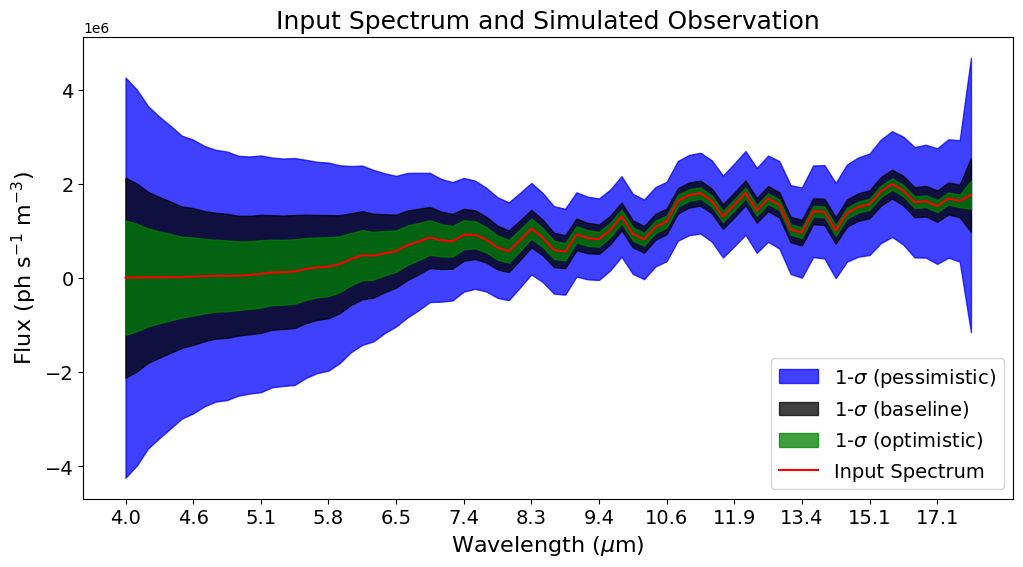

In [45]:
flux_planet_spectrum_rescaled = spectres(new_wavs=instrument.data.inst['wl_bin_edges'],
                                spec_wavs=flux_planet_spectrum[0].value,
                                spec_fluxes=flux_planet_spectrum[1].value,
                                edge_mode=True)

# Plot the input spectrum and measured spectrum
plt.figure(figsize=(12,6))
plt.fill_between(np.arange(len(flux)),
                 flux_planet_spectrum_rescaled-flux_planet_spectrum_rescaled/snr_p[1],
                 flux_planet_spectrum_rescaled+flux_planet_spectrum_rescaled/snr_p[1],
                 color='blue', alpha=0.75, label='1-$\sigma$ (pessimistic)')
plt.fill_between(np.arange(len(flux)),
                 flux_planet_spectrum_rescaled-flux_planet_spectrum_rescaled/snr[1],
                 flux_planet_spectrum_rescaled+flux_planet_spectrum_rescaled/snr[1],
                 color='black', alpha=0.75, label='1-$\sigma$ (baseline)')
plt.fill_between(np.arange(len(flux)),
                 flux_planet_spectrum_rescaled-flux_planet_spectrum_rescaled/snr_o[1],
                 flux_planet_spectrum_rescaled+flux_planet_spectrum_rescaled/snr_o[1],
                 color='green', alpha=0.75, label='1-$\sigma$ (optimistic)')

plt.plot(flux_planet_spectrum_rescaled, color='red', label='Input Spectrum')


plt.title("Input Spectrum and Simulated Observation",fontsize=18)
plt.xlabel('Wavelength ($\mu$m)',fontsize=16)
plt.xticks(ticks=np.arange(len(flux))[::6], labels=np.round(snr[0][::6]*1e6, 1),fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Flux (ph s$^{-1}$ m$^{-3}$)',fontsize=16)
plt.legend(loc="lower right",fontsize=14)
plt.show()

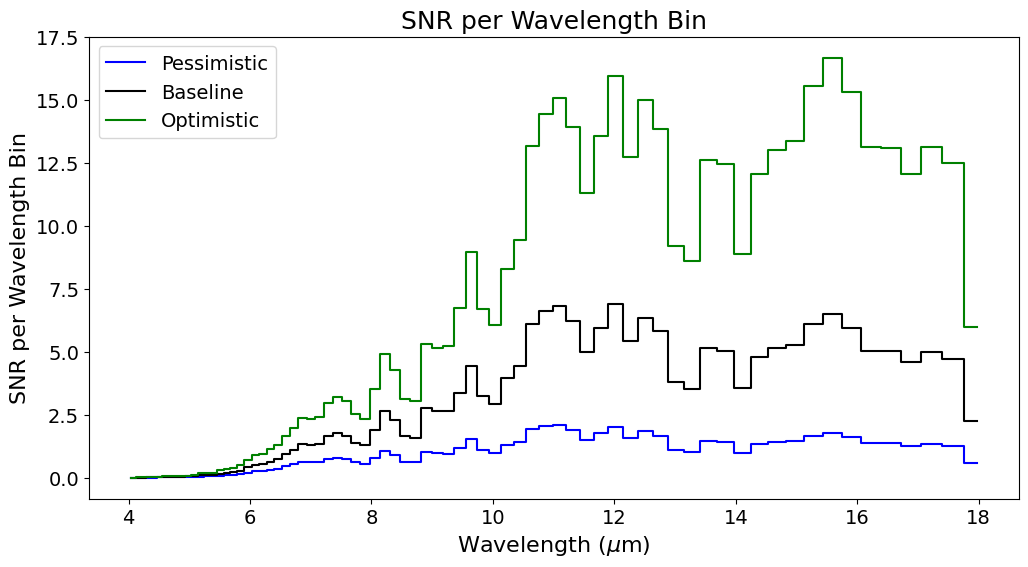

In [50]:
plt.figure(figsize=(12,6))
plt.step(snr_p[0]*1e6, snr_p[1], c='blue',label="Pessimistic")
plt.step(snr[0]*1e6, snr[1], c='black',label="Baseline")
plt.step(snr_o[0]*1e6, snr_o[1], c='green',label="Optimistic")
plt.title('SNR per Wavelength Bin',fontsize=18)
plt.xlabel('Wavelength ($\mu$m)',fontsize=16)
plt.ylabel('SNR per Wavelength Bin',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()